In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
img = cv2.imread("C:/Users/AmineSnoussi/Desktop/SST-Edge-Detection/Training_Dataset/training_set/sst_0.png")
(H, W) = img.shape[:2]
print('Height:',H)
print('Width:',W)

Height: 192
Width: 192


In [2]:
protoPath = "C:/Users/AmineSnoussi/Desktop/SST-Edge-Detection/src/RCF_Pipeline/hed_dir/hed-edge-detector/deploy.prototxt"
modelPath = "C:/Users/AmineSnoussi/Desktop/SST-Edge-Detection/src/RCF_Pipeline/hed_dir/hed-edge-detector/hed_pretrained_bsds.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

In [5]:
# construct a blob out of the input image 
#blob is basically preprocessed image. 
#OpenCV’s new deep neural network (dnn ) module contains two functions that 
#can be used for preprocessing images and preparing them for 
#classification via pre-trained deep learning models.
# It includes scaling and mean subtraction
#How to calculate the mean?
mean_pixel_values= np.average(img, axis = (0,1))
blob = cv2.dnn.blobFromImage(img, scalefactor=0.7, size=(W, H),
                             #mean=(mean_pixel_values[0], mean_pixel_values[1], mean_pixel_values[2]),
                             mean=(105, 117, 123),
                             swapRB= False, crop=False)

In [6]:
#View image after preprocessing (blob)
blob_for_plot = np.moveaxis(blob[0,:,:,:], 0,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


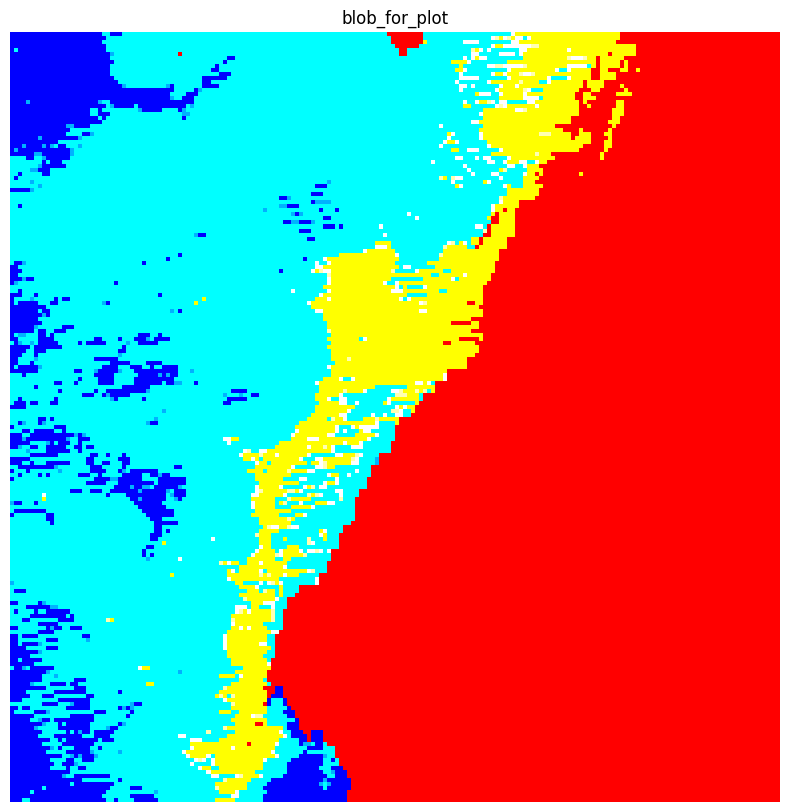

In [10]:
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title('blob_for_plot')
plt.imshow(blob_for_plot)
plt.show()

In [11]:
# set the blob as the input to the network and perform a forward pass
# to compute the edges
net.setInput(blob)
hed = net.forward()
hed = hed[0,0,:,:]  #Drop the other axes 
#hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")  #rescale to 0-255

cv2.imwrite("DLEdgedetection_output.png",hed)

True

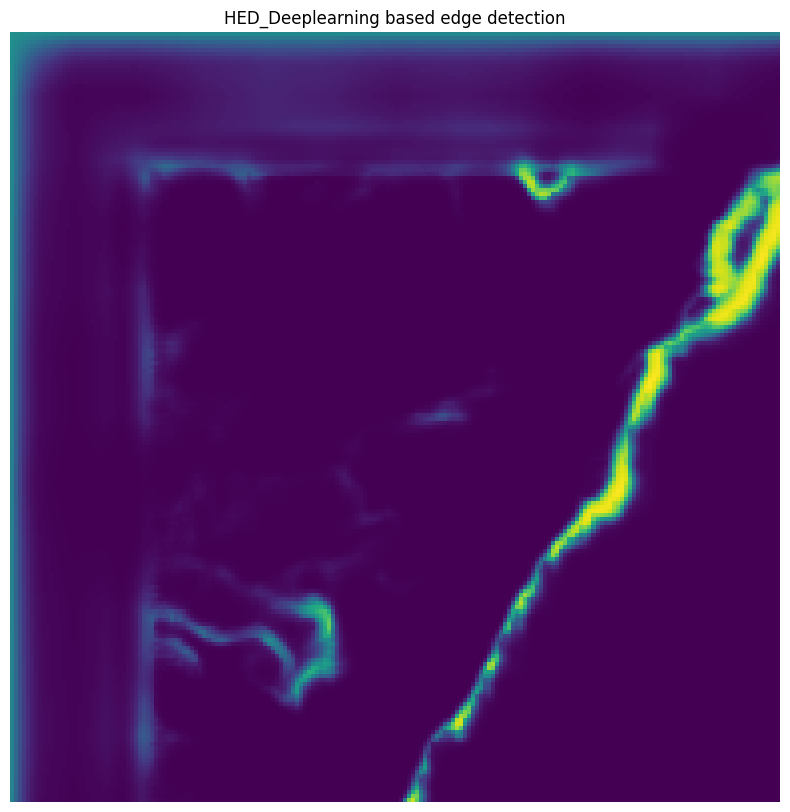

In [12]:
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title('HED_Deeplearning based edge detection')
plt.imshow(hed)
plt.show()